# TP noté HMMA238



## Exercice 1: Le jeu de la vie






In [202]:
run utils.py.ipynb


mwa
mwa
mwa
mwa
mwa
mwa
mwa
mwa
mwa


In [203]:
Z = [[0,0,0,0,0,0],
[0,0,0,1,0,0],
[0,1,0,1,0,0],
[0,0,1,1,0,0],
[0,0,0,0,0,0],
[0,0,0,0,0,0]]

N=calcul_nb_voisins(Z)
N

[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

La sortie de cette fonction calcule le nombre de voisins vivants de chaque cellule sous forme d'une liste représentant le plateau de jeu.

Nous allons maintenant décrire et expliciter le fonctionnement et le but de la fonction iteration jeu qui nous a été fournie.

In [204]:
"Nous donnonscomme argument notre matrice du jeu de la vie à un tour n"
def iteration_jeu(Z):
    
    forme = len(Z), len(Z[0])
    N = calcul_nb_voisins(Z)
    for x in range(1,forme[0]-1):
        for y in range(1,forme[1]-1):
            "conditions de mort puis de naissance"
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return Z
"Nous récupérons notre matrice du jeu de la vie au tour n+1"

'Nous récupérons notre matrice du jeu de la vie au tour n+1'

Cette fonction permet de réaliser un tour du jeu de la vie à partir des valeurs du tour précédent (Z) et de la fonction calcul_nb_voisins. Cette fonction modifie directement  notre liste Z avec la mise à jour des cellules : soit la cellule survie, soit la cellule périt.

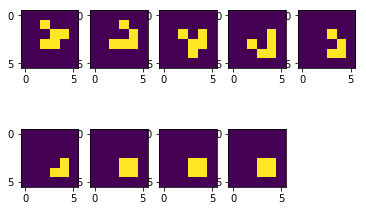

In [205]:
import matplotlib.pyplot as plt
import numpy as np


for i in range(1,10):
    Z=iteration_jeu(Z)
    plt.subplot(2,5,i)
    plt.imshow(np.asarray(Z))

In [119]:
help pyplot.subplot

SyntaxError: invalid syntax (<ipython-input-119-b413a3eaae05>, line 1)

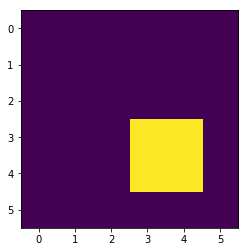

In [191]:
import numpy as np
A=np.asarray(Z)
plt.imshow(A)